In [2]:
from datascience import *
import numpy as np
%matplotlib inline

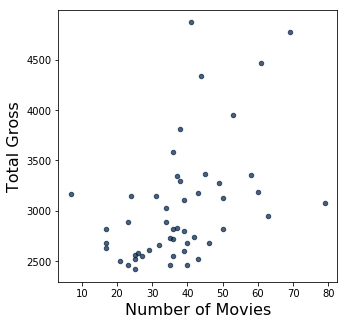

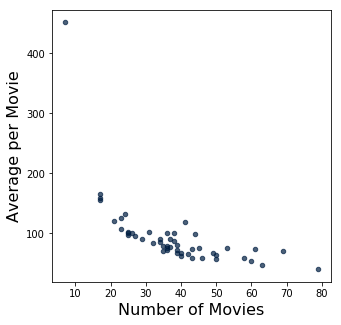

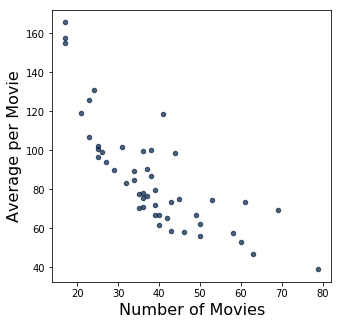

In [8]:
actors = Table().read_table('actors.csv')
actors
actors.scatter('Number of Movies', 'Total Gross')
actors.scatter('Number of Movies', 'Average per Movie')
actors.where('Number of Movies', are.above(10)).scatter('Number of Movies', 'Average per Movie')

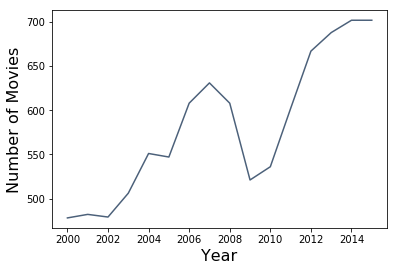

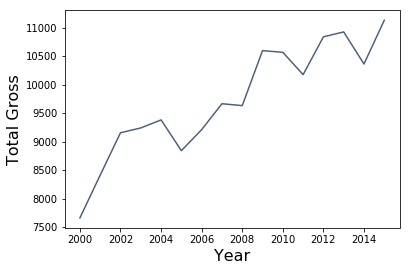

In [16]:
movies_by_year = Table().read_table('movies_by_year.csv')
movies_by_year
movies_by_year.where('Year', are.above(1999)).plot('Year', 'Number of Movies')
movies_by_year.where('Year', are.above(1999)).plot('Year', 'Total Gross')

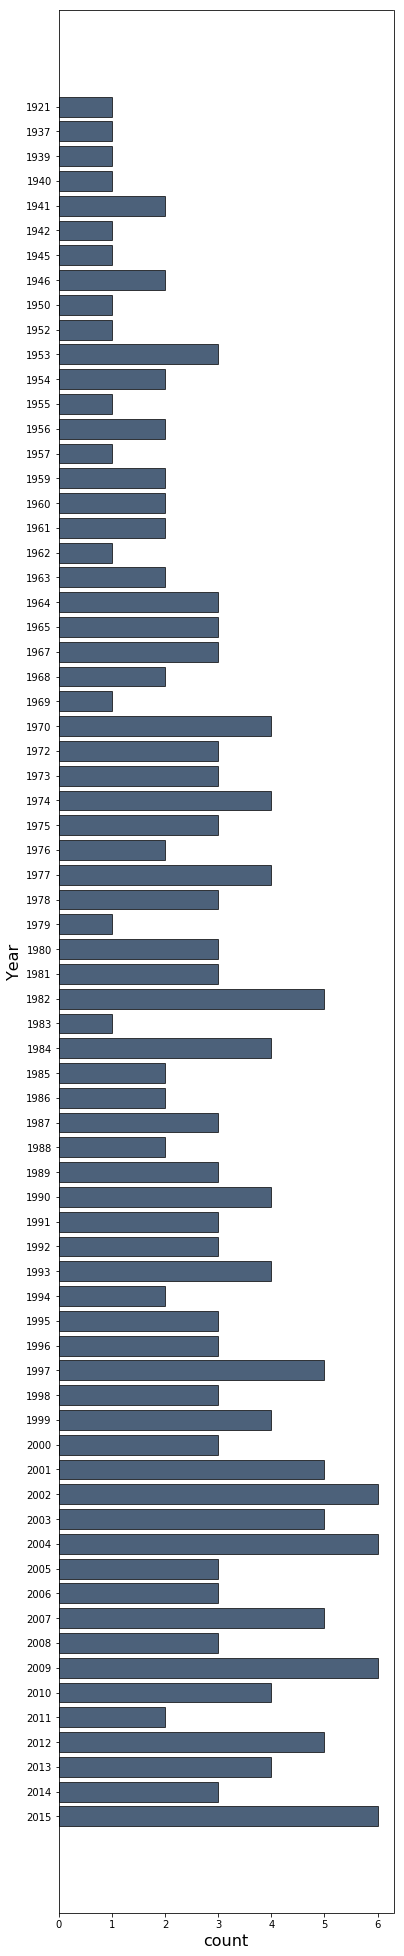

In [33]:
# Categorical Distributions
icecream = Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)
icecream
#icecream.barh('Flavor', 'Number of Cartons')
#icecream.sort('Number of Cartons', descending=True).barh('Flavor', 'Number of Cartons')

top = Table.read_table('top_movies.csv')
#top.select('Title', 'Studio').group('Studio').sort('count', descending=True).barh('Studio')
#top.select('Title', 'Year').group('Year').sort('count', descending=True).barh('Year')
top.select('Title', 'Year').group('Year').barh('Year')

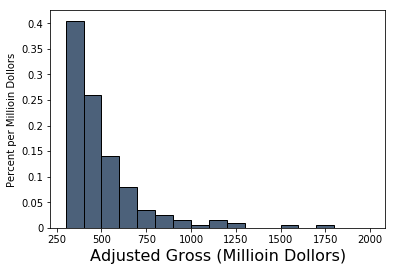

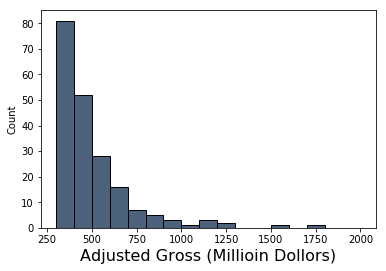

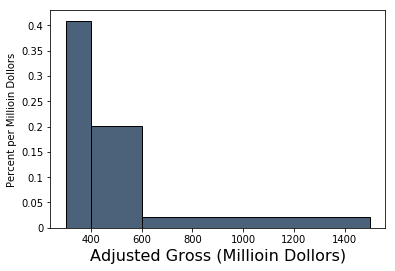

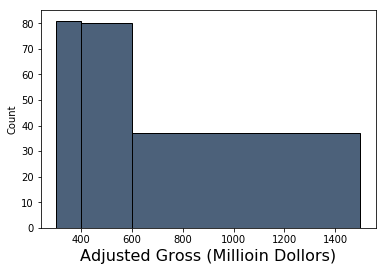

In [69]:
# Numerical Distributions
top.set_format([2, 3], NumberFormatter)
millions = top.select('Title').with_column(
    'Adjusted Gross', np.round(top.column('Gross (Adjusted)')/1e6, 2)
)
millions.hist('Adjusted Gross', unit='Millioin Dollors', bins=np.arange(300, 2001, 100))
millions.hist('Adjusted Gross', unit='Millioin Dollors', bins=np.arange(300, 2001, 100), normed=False)
#millions.bin('Adjusted Gross', bins=np.arange(300, 2001, 100))
#millions.where('Adjusted Gross', are.between(400, 500)).num_rows
millions.hist('Adjusted Gross', unit='Millioin Dollors', bins=[300, 400, 600, 1500])
millions.hist('Adjusted Gross', unit='Millioin Dollors', bins=[300, 400, 600, 1500], normed=False)


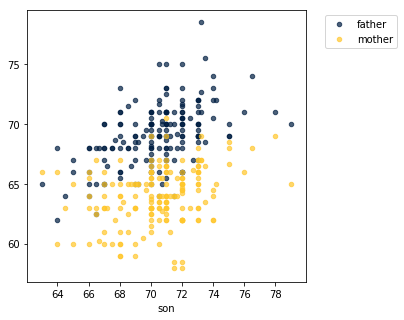

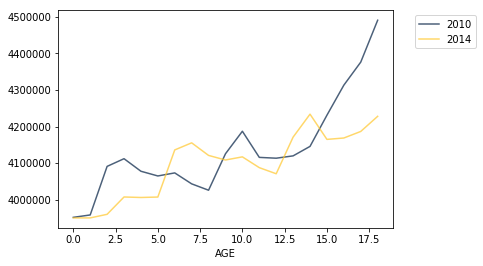

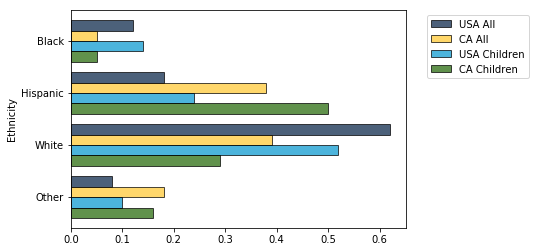

In [91]:
# Overlaid Graphs
galton_subset = Table().read_table('galton_subset.csv')
galton_subset.scatter('son')

us_pop = Table().read_table('nc-est2015-agesex-res.csv')
children = us_pop.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014') \
    .where('SEX', 0).where('AGE', are.between(0, 19)) \
    .relabeled('POPESTIMATE2010', '2010').relabel('POPESTIMATE2014', '2014').drop('SEX')
children.plot('AGE')

usa_ca = Table().read_table('usa_ca_2014.csv')
usa_ca
usa_ca.barh('Ethnicity')